In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score , silhouette_score
from sklearn.cluster import MeanShift

# Mean Shift from scratch

In [6]:
x1 = np.array([1,2,3])
a = np.array([[2,3,4],[4,5,6],[4,5,2]])
dist = np.sqrt(np.sum((x1-a)**2,axis=1))
print(dist)
m = np.argmin(dist)
print(m)

[1.73205081 5.19615242 4.35889894]
0


In [16]:
class My_MeanShift:
    def __init__(self,radius):
        self.radius = radius
    
    def is_convergence(self,new_centroids,old_centroids):
        for i in range(len(new_centroids)):
            if not np.array_equal(new_centroids[i],old_centroids[i]):
                return False
        return True
    
    def fit(self,x):
        centroids = []
        for xi in x:
            centroids.append(tuple(xi))
        centroids = np.array(sorted(list(set(centroids))))
        while True:
            new_centroids = []
            for centroid in centroids:
                curr_cluster = []
                for xi in x:
                    if np.linalg.norm(xi-centroid)<self.radius:
                        curr_cluster.append(xi)
                curr_cluster = np.array(curr_cluster)
                new_centroid = np.mean(curr_cluster,axis=0)
                new_centroids.append(tuple(new_centroid))
            new_centroids_unique = np.array(sorted(list(set(new_centroids))))
            is_converged = self.is_convergence(new_centroids_unique,centroids)
            centroids = new_centroids_unique
            if is_converged:
                break
        self.centroids = centroids
    
    def predict(self,x):
        y = []
        for xi in x:
            distances = np.sqrt(np.sum((xi-self.centroids)**2,axis=1))
            label = np.argmin(distances)
            y.append(label)
        return np.array(y)
                
            

In [17]:
X, y = make_blobs(
        centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

(500, 2)
3


In [24]:
my_ms = My_MeanShift(radius=3)
my_ms.fit(X)

In [29]:
def plot(X,centroids):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(X[:,0],X[:,1],marker='o',c=y)
    ax.scatter(centroids[:,0],centroids[:,1], marker="x", c="red", linewidth=4)
    plt.show()

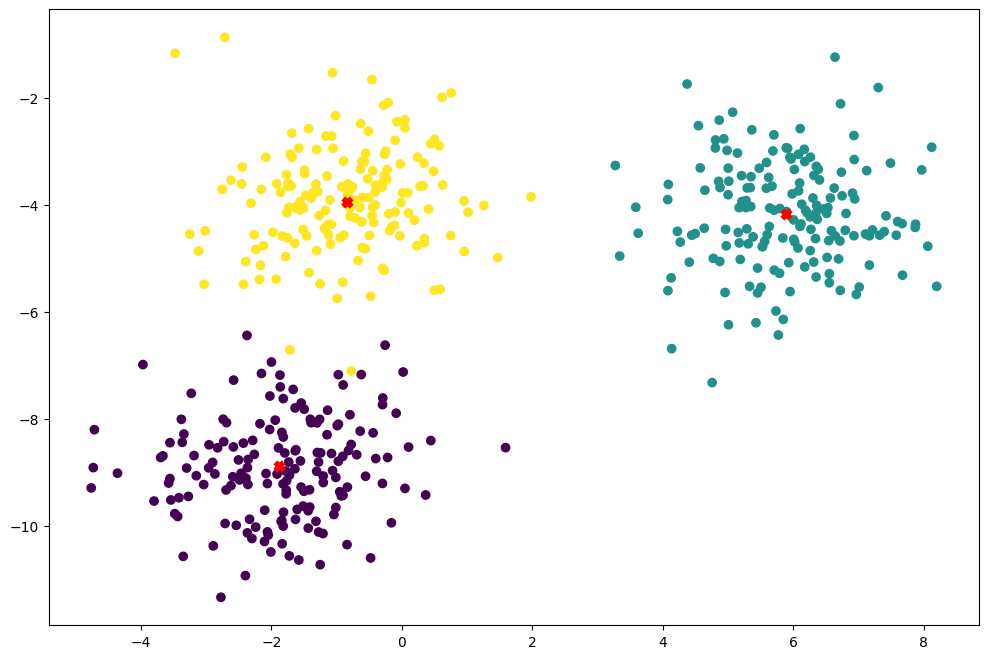

In [30]:
plot(X,my_ms.centroids)

In [27]:
y_pred = my_ms.predict(X)
adjusted_rand_score(y,y_pred)

0.9821085794530156

# Sklearn

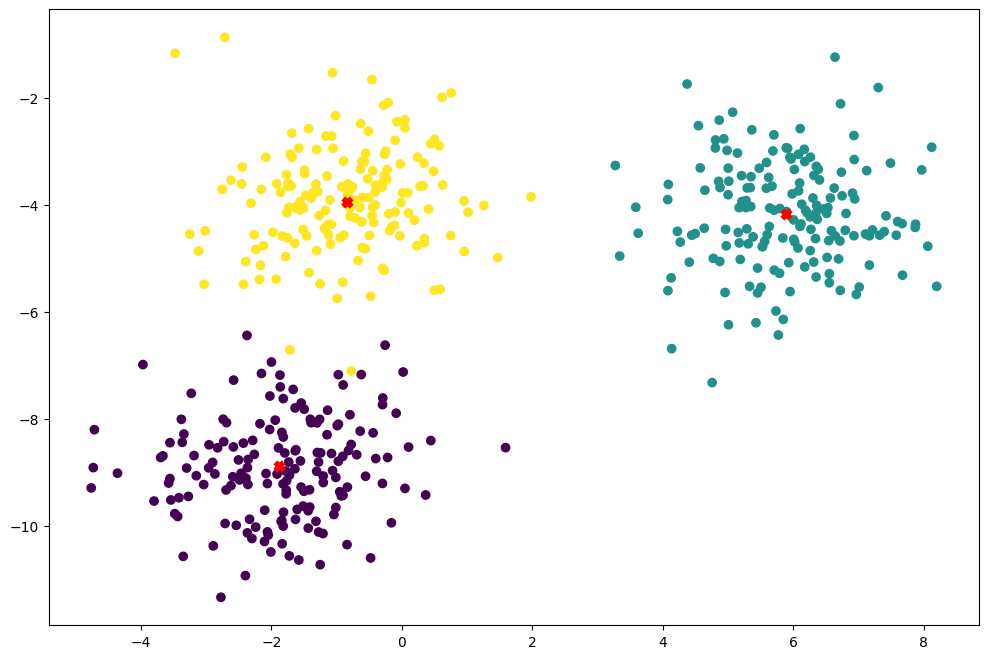

In [31]:
sklearn_ms = MeanShift(bandwidth=3)
sklearn_ms.fit(X)
plot(X,sklearn_ms.cluster_centers_)